## Analysis of mutations
We want to compare Q values of 2lyz, VAL91_2lyz, LEU55_VAL91_2lyz at 400K for 1ns

In [8]:
import numpy as np
import pandas as pd
from src.MDRunner import MDRunner
import matplotlib.pyplot as plt


In [11]:
mutations: list[str] = ["2lyz", "VAL91_2lyz", "LEU55_VAL91_2lyz"]
temperature: int = 400
time_in_ns: float = 1.0 # REMBER TO SPECIFY TIME AS 1.0

runner = MDRunner(protein_name="2lyz")
qvalue = pd.DataFrame()

for mutation in mutations:
    filename = f"{mutation}_{time_in_ns}ns_at_{temperature}K"
    runner.computeQValue(past_run=filename)
    df = pd.read_csv("log/native_contact.csv")
    qvalue[mutation] = df["nc"]
qvalue.head()

Computing Q-Value for past_run: 2lyz_1.0ns_at_400K

####################### Q-VALUE #######################
Frame at which we are computing Q-value: 250.0
Computing Q-value...
Computed a Q-value    of : 426
Computed a Q-value(%) of : 85.2
Log at: log/Qvalue.log and log/native_contacts.csv
Result written at: results/qvalues.csv
Computing Q-Value for past_run: VAL91_2lyz_1.0ns_at_400K

####################### Q-VALUE #######################
Frame at which we are computing Q-value: 250.0
Computing Q-value...
Computed a Q-value    of : 427
Computed a Q-value(%) of : 85.4
Log at: log/Qvalue.log and log/native_contacts.csv
Result written at: results/qvalues.csv
Computing Q-Value for past_run: LEU55_VAL91_2lyz_1.0ns_at_400K

####################### Q-VALUE #######################
Frame at which we are computing Q-value: 250.0
Computing Q-value...
Computed a Q-value    of : 451
Computed a Q-value(%) of : 90.2
Log at: log/Qvalue.log and log/native_contacts.csv
Result written at: results/qvalues

,2lyz,VAL91_2lyz,LEU55_VAL91_2lyz
0,500,500,500
1,466,464,471
2,463,463,470
3,458,463,470
4,465,461,463


In [12]:
print(qvalue)

     2lyz  VAL91_2lyz  LEU55_VAL91_2lyz
0     500         500               500
1     466         464               471
2     463         463               470
3     458         463               470
4     465         461               463
..    ...         ...               ...
245   430         425               443
246   437         430               443
247   430         431               443
248   429         420               436
249   426         427               451

[250 rows x 3 columns]


Text(0.5, 1.0, 'Q(t)')

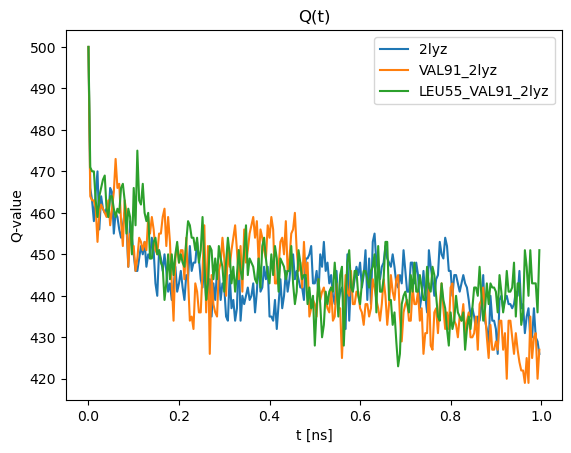

In [23]:
positions = range(len(qvalue.index))
for mutation in mutations:
    plt.plot(time_in_ns/len(qvalue.index) *  np.array(positions),      qvalue[mutation], label = mutation) 
    plt.legend()
plt.xlabel('t [ns]')
plt.ylabel('Q-value')
plt.title("Q (t)")